In [1]:
import pandas as pd
import json

In [2]:
results= json.load(open("../results/results.json", "r"))

results

[{'Model': 'dummy-most_frequent',
  'Test Dataset': 'ParlaCAP-HR-test',
  'Macro F1': 0.005687947435520251,
  'Micro F1': 0.0667433831990794,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'HR': {'Macro F1': 0.005687947435520251,
    'Micro F1': 0.0667433831990794}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'ParlaCAP-EN-test',
  'Macro F1': 0.04875935164227083,
  'Micro F1': 0.05593607305936073,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'GB': {'Macro F1': 0.04875935164227083,
    'Micro F1': 0.05593607305936073}}},
 {'Model': 'dummy-most_frequent',
  'Test Dataset': 'ParlaCAP-EN-test',
  'Macro F1': 0.005186417457676876,
  'Micro F1': 0.06050228310502283,
  'Epochs': None,
  'Learning Rate': None,
  'Language-Specific Scores': {'GB': {'Macro F1': 0.005186417457676876,
    'Micro F1': 0.06050228310502283}}},
 {'Model': 'dummy-stratified',
  'Test Dataset': 'ParlaCAP-RS-test',
  'Macro F1': 0.04598311711028962,
  'Micro 

In [3]:
results_topic = []

lang_map = {
    "English": "GB",
    "Croatian": "HR",
    "Serbian": "RS",
    "Bosnian": "BA"
}

for x in results:
    cur_result = {}
    cur_result["Model"] = x["Model"]
    for lang in ["English", "Croatian", "Serbian", "Bosnian"]:
        lang_code = lang_map[lang]
        if lang_code in x['Language-Specific Scores']:
            cur_result[f"{lang} (macro-F1)"] = x['Language-Specific Scores'][lang_code]["Macro F1"]
            cur_result[f"{lang} (micro-F1)"] = x['Language-Specific Scores'][lang_code]["Micro F1"]
    results_topic.append(cur_result)

temp_results_df = pd.DataFrame(results_topic)
temp_results_df

,Model,Croatian (macro-F1),Croatian (micro-F1),English (macro-F1),English (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1)
0,dummy-most_frequent,0.005688,0.066743,NaN,NaN,NaN,NaN,NaN,NaN
1,dummy-stratified,NaN,NaN,0.048759,0.055936,NaN,NaN,NaN,NaN
2,dummy-most_frequent,NaN,NaN,0.005186,0.060502,NaN,NaN,NaN,NaN
3,dummy-stratified,NaN,NaN,NaN,NaN,0.045983,0.058352,NaN,NaN
4,dummy-most_frequent,NaN,NaN,NaN,NaN,0.005657,0.066362,NaN,NaN
...,...,...,...,...,...,...,...,...,...
79,gpt-5,NaN,NaN,NaN,NaN,0.707285,0.702517,NaN,NaN
80,gpt-5-mini-2025-08-07,NaN,NaN,NaN,NaN,0.683720,0.677346,NaN,NaN
81,gpt-5-mini-2025-08-07,NaN,NaN,NaN,NaN,NaN,NaN,0.621466,0.632282
82,gpt-5-nano-2025-08-07,NaN,NaN,NaN,NaN,NaN,NaN,0.564183,0.584951


In [4]:
merged_results = []

temp_results = temp_results_df.to_dict(orient="records")

for model in list(temp_results_df.Model.unique()):
	model_dict = {}
	model_dict["Model"] = model
	for x in temp_results:
		if x["Model"] == model:
			for lang in ["English", "Croatian", "Serbian", "Bosnian"]:
				if x[f"{lang} (macro-F1)"] >= 0:
					model_dict[f"{lang} (macro-F1)"] = x[f"{lang} (macro-F1)"]
				if x[f"{lang} (micro-F1)"] >= 0:
					model_dict[f"{lang} (micro-F1)"] = x[f"{lang} (micro-F1)"]
	merged_results.append(model_dict)

results_df = pd.DataFrame(merged_results)
results_df

,Model,Croatian (macro-F1),Croatian (micro-F1),English (macro-F1),English (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1)
0,dummy-most_frequent,0.005688,0.066743,0.005186,0.060502,0.005657,0.066362,0.008591,0.104369
1,dummy-stratified,0.041230,0.056387,0.048759,0.055936,0.045983,0.058352,0.041611,0.060680
2,ParlaCAP-classifier,0.685674,0.676640,0.722963,0.723744,0.706879,0.704805,0.646059,0.645631
3,COMPLEMENTNB,0.019588,0.104718,0.008119,0.044521,0.012964,0.083524,0.020087,0.135922
4,SVC,0.073054,0.125432,0.034864,0.070776,0.056514,0.124714,0.049750,0.137136
5,gemma3:27b,0.554684,0.550691,0.619997,0.619863,0.570447,0.565541,0.510311,0.500000
6,llama4:scout,0.483652,0.484465,0.513116,0.525114,0.477661,0.471396,0.382006,0.379854
7,llama3.3:latest,0.554660,0.565017,0.631683,0.640411,0.612905,0.608696,0.525678,0.523058
8,qwen3:32b,0.597559,0.581128,0.646663,0.649543,0.569208,0.551487,0.479701,0.464806
9,deepseek-r1:14b,0.311416,0.284235,0.404499,0.381279,0.302740,0.279176,0.266175,0.259709


In [55]:
results_df.to_json("results.json", orient="records", lines=True)

# Plot a bar plot

In [5]:
import pandas as pd

In [6]:
results_df = pd.read_json("results.json", orient="records", lines=True)

In [7]:
results_df

,Model,Croatian (macro-F1),Croatian (micro-F1),English (macro-F1),English (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1)
0,dummy-most_frequent,0.005688,0.066743,0.005186,0.060502,0.005657,0.066362,0.008591,0.104369
1,dummy-stratified,0.041230,0.056387,0.048759,0.055936,0.045983,0.058352,0.041611,0.060680
2,ParlaCAP-classifier,0.685674,0.676640,0.722963,0.723744,0.706879,0.704805,0.646059,0.645631
3,COMPLEMENTNB,0.019588,0.104718,0.008119,0.044521,0.012964,0.083524,0.020087,0.135922
4,SVC,0.073054,0.125432,0.034864,0.070776,0.056514,0.124714,0.049750,0.137136
5,gemma3:27b,0.554684,0.550691,0.619997,0.619863,0.570447,0.565541,0.510311,0.500000
6,llama4:scout,0.483652,0.484465,0.513116,0.525114,0.477661,0.471396,0.382006,0.379854
7,llama3.3:latest,0.554660,0.565017,0.631683,0.640411,0.612905,0.608696,0.525678,0.523058
8,qwen3:32b,0.597559,0.581128,0.646663,0.649543,0.569208,0.551487,0.479701,0.464806
9,deepseek-r1:14b,0.311416,0.284235,0.404499,0.381279,0.302740,0.279176,0.266175,0.259709


In [8]:
results_df = results_df[~results_df["Model"].isin( ["dummy-stratified"])]

In [9]:
rename_dict = {
    "gpt-4o-2024-08-06": "GPT-4o",
    "gpt-3.5-turbo-0125": "GPT-3.5-Turbo",
    "gpt-4o-mini-2024-07-18": "GPT-4o-mini",
    "gemma3:27b": "Gemma 3",
    "gemma2:27b": "Gemma 2",
    "llama3.3:latest": "LLaMA 3.3",
    "deepseek-r1:14b": "DeepSeek-R1-Distill",
    "dummy-most_frequent": "Dummy (Frequent)",
    "dummy-stratified": "Dummy (Stratified)",
    "X-GENRE classifier": "Fine-Tuned XLM-R",
    "SVC": "Support Vector Machine",
    "COMPLEMENTNB": "Naive Bayes Classifier",
    "ParlaCAP-classifier": "Fine-Tuned BERT-Like Model",
	"gpt-5-mini-2025-08-07": "GPT-5-mini",
	"gpt-5": "GPT-5",
	"gpt-5-nano-2025-08-07": "GPT-5-Nano",
	"llama4:scout": "LLaMA 4 Scout",
	"qwen3:32b": "Qwen 3",
	'google/gemini-2.5-flash-lite': "Gemini 2.5 Flash Lite",
	'google/gemini-2.5-flash': "Gemini 2.5 Flash",
	'mistralai/mistral-medium-3.1': "Mistral Medium 3.1",
	'mistralai/mistral-small-3.2-24b-instruct': "Mistral Small 3.2",
	'cohere/command-a': "Command A"
    # Add more if needed
}

# Apply the renaming
results_df["Model"] = results_df["Model"].replace(rename_dict)

# Change the order of columns

#results_df = results_df[['Model', 'Croatian (macro-F1)', 'Croatian (micro-F1)','English (macro-F1)', 'English (micro-F1)',]]

/tmp/ipykernel_2320450/3469670373.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["Model"] = results_df["Model"].replace(rename_dict)


In [10]:
print(results_df.sort_values(by="Croatian (macro-F1)", ascending=False).to_markdown(index=False))

| Model                      |   Croatian (macro-F1) |   Croatian (micro-F1) |   English (macro-F1) |   English (micro-F1) |   Serbian (macro-F1) |   Serbian (micro-F1) |   Bosnian (macro-F1) |   Bosnian (micro-F1) |
|:---------------------------|----------------------:|----------------------:|---------------------:|---------------------:|---------------------:|---------------------:|---------------------:|---------------------:|
| GPT-5                      |            0.691037   |             0.686997  |           0.733871   |            0.731735  |           0.707285   |            0.702517  |           0.642834   |             0.652913 |
| Fine-Tuned BERT-Like Model |            0.685674   |             0.67664   |           0.722963   |            0.723744  |           0.706879   |            0.704805  |           0.646059   |             0.645631 |
| GPT-5-mini                 |            0.677632   |             0.672037  |           0.728963   |            0.729452  |        

In [11]:
results_df = results_df[results_df["Model"].isin(['Fine-Tuned BERT-Like Model', 'Gemini 2.5 Flash', 'GPT-5','GPT-4o', 'Mistral Medium 3.1', 'LLaMA 3.3', 'Gemma 3', 'GPT-3.5-Turbo', 'Qwen 3', 'DeepSeek-R1-Distill',  'Dummy (Frequent)'])]

results_df.sort_values(by="Model", ascending=True)

,Model,Croatian (macro-F1),Croatian (micro-F1),English (macro-F1),English (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1)
9,DeepSeek-R1-Distill,0.311416,0.284235,0.404499,0.381279,0.302740,0.279176,0.266175,0.259709
0,Dummy (Frequent),0.005688,0.066743,0.005186,0.060502,0.005657,0.066362,0.008591,0.104369
2,Fine-Tuned BERT-Like Model,0.685674,0.676640,0.722963,0.723744,0.706879,0.704805,0.646059,0.645631
13,GPT-3.5-Turbo,0.487166,0.484465,0.544780,0.546804,0.553799,0.541190,0.489274,0.487864
10,GPT-4o,0.671428,0.663982,0.744535,0.744292,0.691011,0.688787,0.629196,0.629854
12,GPT-5,0.691037,0.686997,0.733871,0.731735,0.707285,0.702517,0.642834,0.652913
17,Gemini 2.5 Flash,0.661393,0.653625,0.709476,0.712329,0.633297,0.631579,0.586248,0.589806
5,Gemma 3,0.554684,0.550691,0.619997,0.619863,0.570447,0.565541,0.510311,0.500000
7,LLaMA 3.3,0.554660,0.565017,0.631683,0.640411,0.612905,0.608696,0.525678,0.523058
18,Mistral Medium 3.1,0.627185,0.611047,0.666442,0.664384,0.596991,0.577803,0.514443,0.487864


In [12]:
columns_to_drop = []
for column in results_df.columns.to_list():
	if "macro-F1" not in column:
		columns_to_drop.append(column)

print(columns_to_drop)

# Add a column with averages
results_df["Average (macro-F1)"] = results_df.drop(columns=columns_to_drop).mean(axis=1)
results_df

['Model', 'Croatian (micro-F1)', 'English (micro-F1)', 'Serbian (micro-F1)', 'Bosnian (micro-F1)']


,Model,Croatian (macro-F1),Croatian (micro-F1),English (macro-F1),English (micro-F1),Serbian (macro-F1),Serbian (micro-F1),Bosnian (macro-F1),Bosnian (micro-F1),Average (macro-F1)
0,Dummy (Frequent),0.005688,0.066743,0.005186,0.060502,0.005657,0.066362,0.008591,0.104369,0.006281
2,Fine-Tuned BERT-Like Model,0.685674,0.676640,0.722963,0.723744,0.706879,0.704805,0.646059,0.645631,0.690394
5,Gemma 3,0.554684,0.550691,0.619997,0.619863,0.570447,0.565541,0.510311,0.500000,0.563860
7,LLaMA 3.3,0.554660,0.565017,0.631683,0.640411,0.612905,0.608696,0.525678,0.523058,0.581231
8,Qwen 3,0.597559,0.581128,0.646663,0.649543,0.569208,0.551487,0.479701,0.464806,0.573283
9,DeepSeek-R1-Distill,0.311416,0.284235,0.404499,0.381279,0.302740,0.279176,0.266175,0.259709,0.321207
10,GPT-4o,0.671428,0.663982,0.744535,0.744292,0.691011,0.688787,0.629196,0.629854,0.684042
12,GPT-5,0.691037,0.686997,0.733871,0.731735,0.707285,0.702517,0.642834,0.652913,0.693757
13,GPT-3.5-Turbo,0.487166,0.484465,0.544780,0.546804,0.553799,0.541190,0.489274,0.487864,0.518755
17,Gemini 2.5 Flash,0.661393,0.653625,0.709476,0.712329,0.633297,0.631579,0.586248,0.589806,0.647603


<module 'matplotlib.pyplot' from '/home/tajak/miniconda3/envs/emma_main/lib/python3.9/site-packages/matplotlib/pyplot.py'>

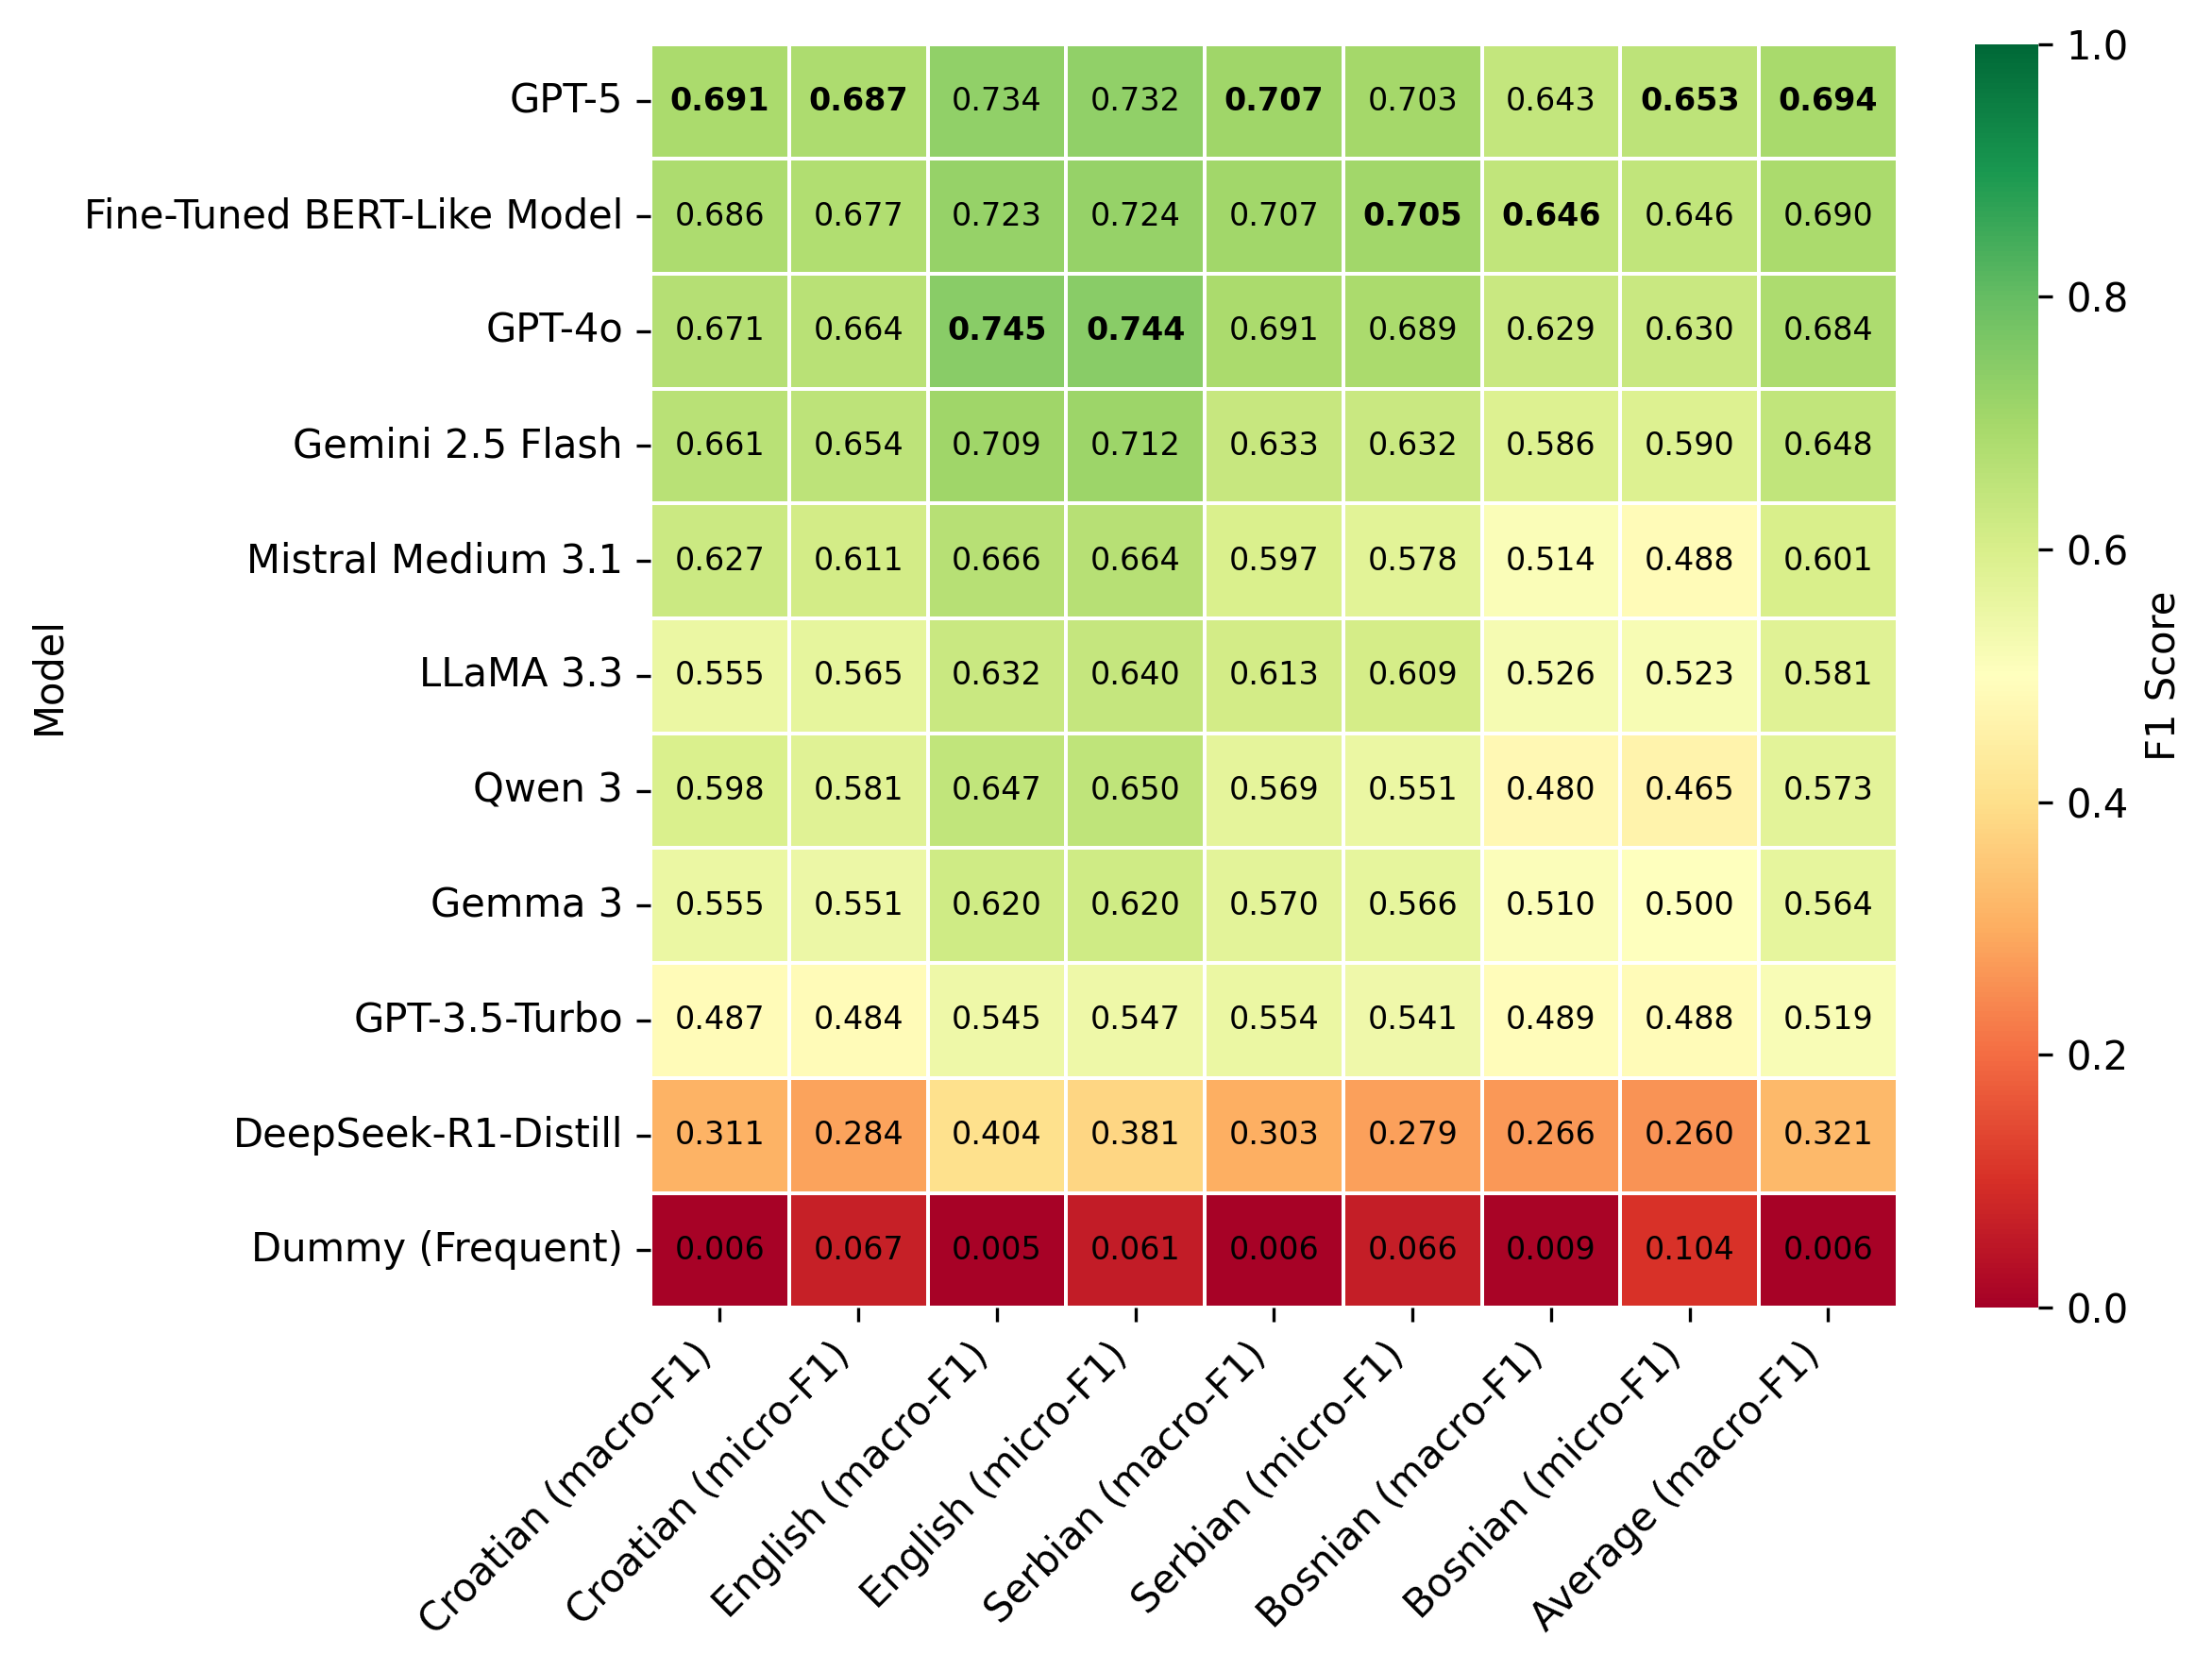

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set figure size and DPI
plt.figure(figsize=(8, 6), dpi=300)

# Prepare data
data = results_df.set_index("Model").sort_values(by="Average (macro-F1)", ascending=False)

# Create heatmap without annotations
ax = sns.heatmap(
    data,
    annot=False,  # We'll add custom annotations manually
    fmt=".3f",
    cmap="RdYlGn",
    vmin=0,  # Raise the minimum value for lighter backgrounds
    vmax=1,  # Max at 1.0
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'F1 Score'}
)

# Add custom text annotations
for x in range(data.shape[1]):  # columns
    col = data.iloc[:, x]
    max_val = col.max()
    for y in range(data.shape[0]):  # rows
        val = col.iloc[y]
        text = f"{val:.3f}"
        if val == max_val:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontweight='bold', fontsize=8)
        else:
            ax.text(x + 0.5, y + 0.5, text,
                    ha='center', va='center', fontsize=8)

# Tweak layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig("parlacap-topic-results-heatmap.png", dpi=300)
plt


In [14]:
# Rename rule
def create_rename_dict(df):
	columns = df.columns.to_list()
	new_dict = {}
	for column in columns:
		if "macro-F1" in column:
			new_dict[column] = column.replace(" (macro-F1)", "")
	return new_dict

rename_dict = create_rename_dict(results_df)
print(rename_dict)

results_df.rename(columns=rename_dict, inplace=True)
results_df

{'Croatian (macro-F1)': 'Croatian', 'English (macro-F1)': 'English', 'Serbian (macro-F1)': 'Serbian', 'Bosnian (macro-F1)': 'Bosnian', 'Average (macro-F1)': 'Average'}


,Model,Croatian,Croatian (micro-F1),English,English (micro-F1),Serbian,Serbian (micro-F1),Bosnian,Bosnian (micro-F1),Average
0,Dummy (Frequent),0.005688,0.066743,0.005186,0.060502,0.005657,0.066362,0.008591,0.104369,0.006281
2,Fine-Tuned BERT-Like Model,0.685674,0.676640,0.722963,0.723744,0.706879,0.704805,0.646059,0.645631,0.690394
5,Gemma 3,0.554684,0.550691,0.619997,0.619863,0.570447,0.565541,0.510311,0.500000,0.563860
7,LLaMA 3.3,0.554660,0.565017,0.631683,0.640411,0.612905,0.608696,0.525678,0.523058,0.581231
8,Qwen 3,0.597559,0.581128,0.646663,0.649543,0.569208,0.551487,0.479701,0.464806,0.573283
9,DeepSeek-R1-Distill,0.311416,0.284235,0.404499,0.381279,0.302740,0.279176,0.266175,0.259709,0.321207
10,GPT-4o,0.671428,0.663982,0.744535,0.744292,0.691011,0.688787,0.629196,0.629854,0.684042
12,GPT-5,0.691037,0.686997,0.733871,0.731735,0.707285,0.702517,0.642834,0.652913,0.693757
13,GPT-3.5-Turbo,0.487166,0.484465,0.544780,0.546804,0.553799,0.541190,0.489274,0.487864,0.518755
17,Gemini 2.5 Flash,0.661393,0.653625,0.709476,0.712329,0.633297,0.631579,0.586248,0.589806,0.647603


In [15]:
results_gpt = results_df[~results_df["Model"].isin(["Dummy (Frequent)", "Fine-Tuned BERT-Like Model", 'DeepSeek-R1-Distill'])]

results_transposed = results_gpt.set_index(results_gpt["Model"]).drop(columns=["Model", 'Serbian (micro-F1)', 'Croatian (micro-F1)', 'English (micro-F1)', 'Bosnian (micro-F1)', 'Average']).transpose()

results_transposed = results_transposed[['GPT-3.5-Turbo', 'GPT-4o', 'GPT-5', 'Mistral Medium 3.1', 'Gemini 2.5 Flash','Gemma 3', 'LLaMA 3.3', 'Qwen 3']]

results_transposed

Model,GPT-3.5-Turbo,GPT-4o,GPT-5,Mistral Medium 3.1,Gemini 2.5 Flash,Gemma 3,LLaMA 3.3,Qwen 3
Croatian,0.487166,0.671428,0.691037,0.627185,0.661393,0.554684,0.554660,0.597559
English,0.544780,0.744535,0.733871,0.666442,0.709476,0.619997,0.631683,0.646663
Serbian,0.553799,0.691011,0.707285,0.596991,0.633297,0.570447,0.612905,0.569208
Bosnian,0.489274,0.629196,0.642834,0.514443,0.586248,0.510311,0.525678,0.479701


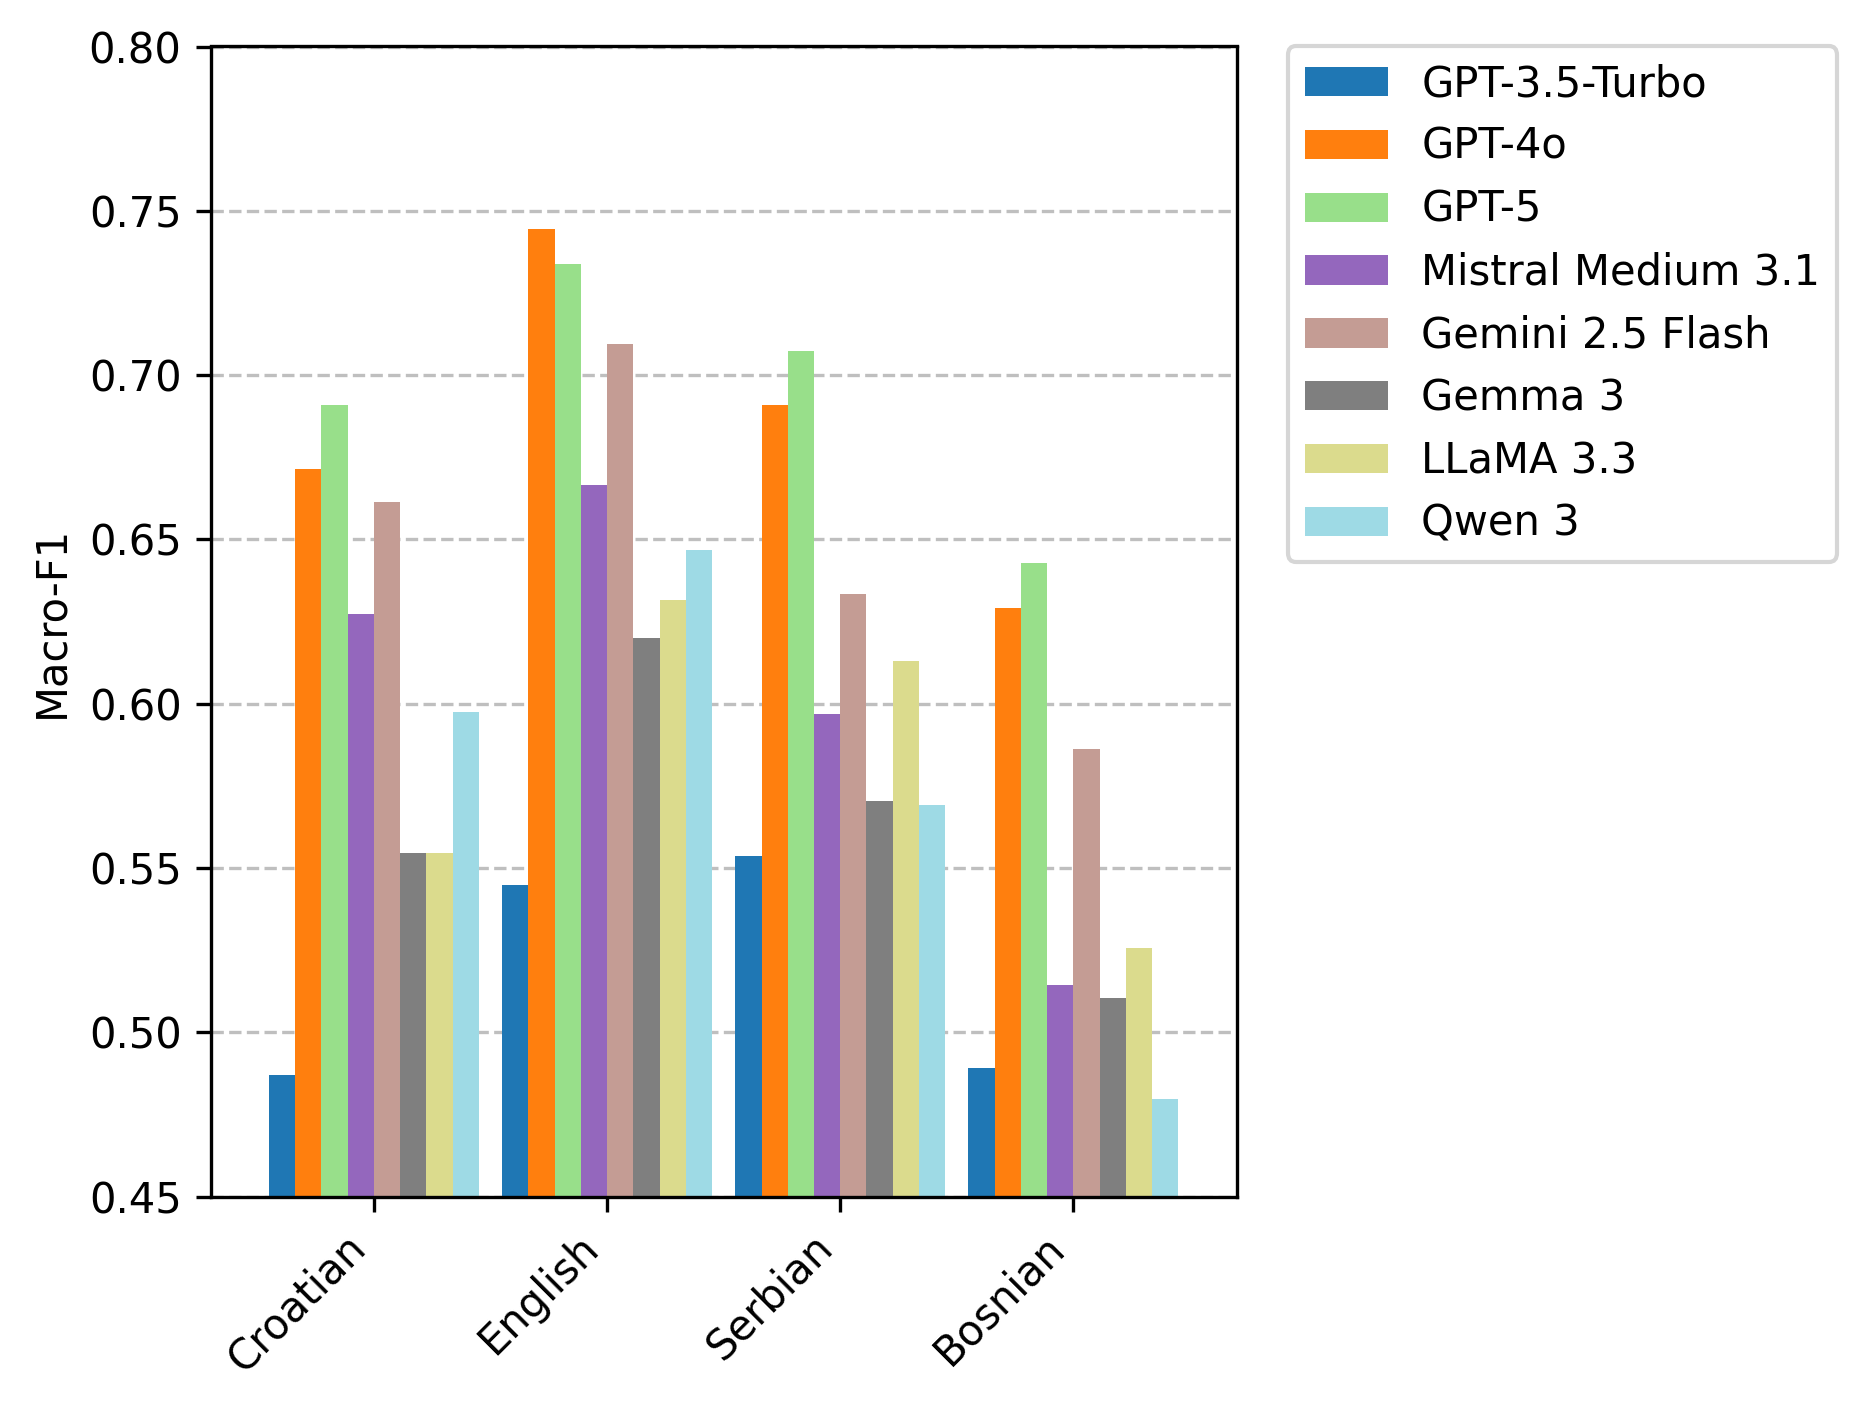

In [17]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 300 

ax = results_transposed.plot(kind="bar", width=0.9,colormap="tab20")

# Move legend outside
ax.legend(
    bbox_to_anchor=(1.05, 1),  # Position legend to the right
    loc='upper left',          # Anchor point
    borderaxespad=0
)

ax.set_ylim(0.45, None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylabel("Macro-F1")

# Add horizontal grid lines every 0.05
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.arange(round(ymin, 2), round(ymax + 0.05, 2), 0.05))  # steps of 0.05
ax.yaxis.grid(True, linestyle='--', linewidth=0.8, color='gray', alpha=0.5)
ax.set_axisbelow(True)

plt.tight_layout()  # Adjust layout so nothing is cut off
plt.savefig("parlacap_gpt_comparison.png", dpi=300)
plt.show()


# Plot inference & performance plot

In [2]:
data = [
  {
    "Model": "GPT-4o",
    "Avg. inference (s per instance)": "0.96",
    "Avg. performance (macro-F1)": "0.68"
  },
  {
    "Model": "GPT-3.5-Turbo",
    "Avg. inference (s per instance)": "0.74",
    "Avg. performance (macro-F1)": "0.52"
  },
  {
    "Model": "GPT-5",
    "Avg. inference (s per instance)": "5.54",
    "Avg. performance (macro-F1)": "0.69"
  },
  {
    "Model": "Gemma 3",
    "Avg. inference (s per instance)": "1.40",
    "Avg. performance (macro-F1)": "0.56"
  },
  {
    "Model": "DeepSeek-R1-Distill",
    "Avg. inference (s per instance)": "0.77",
    "Avg. performance (macro-F1)": "0.32"
  },
  {
    "Model": "LLaMA 3.3",
    "Avg. inference (s per instance)": "1.03",
    "Avg. performance (macro-F1)": "0.58"
  },
  {
    "Model": "Qwen 3",
    "Avg. inference (s per instance)": "0.61",
    "Avg. performance (macro-F1)": "0.57"
  },
  {
    "Model": "Fine-Tuned BERT-Like Model",
    "Avg. inference (s per instance)": "0.02",
    "Avg. performance (macro-F1)": "0.69"
  },
  {
    "Model": "Gemini 2.5 Flash",
    "Avg. inference (s per instance)": "0.63",
    "Avg. performance (macro-F1)": "0.65"
  },
  {
    "Model": "Mistral Medium 3.1",
    "Avg. inference (s per instance)": "0.84",
    "Avg. performance (macro-F1)": "0.60"
  }
]

df = pd.DataFrame.from_records(data)

df

,Model,Avg. inference (s per instance),Avg. performance (macro-F1)
0,GPT-4o,0.96,0.68
1,GPT-3.5-Turbo,0.74,0.52
2,GPT-5,5.54,0.69
3,Gemma 3,1.40,0.56
4,DeepSeek-R1-Distill,0.77,0.32
5,LLaMA 3.3,1.03,0.58
6,Qwen 3,0.61,0.57
7,Fine-Tuned BERT-Like Model,0.02,0.69
8,Gemini 2.5 Flash,0.63,0.65
9,Mistral Medium 3.1,0.84,0.60
